In [12]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
data = pd.read_csv("./data.csv")

# 서론

## 프로젝트 배경
유방암은 세계에서 가장 흔한 여성암입니다. 여성암의 약 24%를 차지하며, 사망률 또한 15.5%로 가장 높습니다.

유방암은 조기 발견이 무엇보다 중요합니다.

2기 이내 유방암 환자의 5년 생존율은 91.8%를 넘을 정도로, 일찍 발견되면 완치 가능성이 높습니다.

(출처: 강남세브란스병원)


## 데이터셋 소개

1995년 Dr. William H. Wolberg가 주도하여 수집된 스콘신 대학교 병원에서 얻은 유방 종괴의 미세 바늘 흡인물 이미지를 기반으로 한 데이터

|기본 특성|설명|
|------|------|
|Radius (반경)|핵 경계선의 평균 거리|
|Texture (질감)|회색조 이미지에서 핵 표면의 표준 편차 (명암 대비)|
|Perimeter (둘레)|핵 경계선의 총 길이|
|Area (면적)|핵의 크기|
|Smoothness (평활도)|핵 경계선의 지역적 변화 (울퉁불퉁함 정도)|
|Compactness (조밀도)|P2/A−1.0 (둘레 제곱 / 면적 - 1.0)으로 계산된 정도|
|Concavity (오목함)|핵 경계선의 오목한 부분의 심각도|
|Concave Points (오목점)|핵 경계선의 오목한 부분의 수|
|Symmetry (대칭)|핵의 모양이 얼마나 대칭적인지|
|Fractal Dimension (프랙탈 차원)|핵 경계선이 얼마나 복잡한지|

1. Mean (평균): 해당 특성의 평균값

2. Standard Error (표준 오차): 해당 특성의 변동성을 나타내는 표준 오차
3. Worst (최대/최악): 해당 특성의 가장 큰(최악의) 값. 이는 종양의 가장 공격적인 특징을 반영

## 목표
해당 종양이 **악성(Malignant)** 인지  **양성(Benign)** 인지 분류할 수 있다.



---



# 데이터 이해 및 탐색적 분석 (EDA)

## 기본 정보 및 결측치 확인

In [14]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [15]:
data.shape

(569, 33)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [17]:
# 'id', 'Unnamed: 32'컬럼을 삭제한 새로운 데이터 프레임 생성
df = data.drop(columns=['id', 'Unnamed: 32'])

In [18]:
# Diagnosis의 진단명을 0(양성: Benign), 1(악성: Malignant)로 변경
print(f"변경 전: {np.unique(df['diagnosis'])}")

df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

print(f"변경 후: {np.unique(df['diagnosis'])}")

변경 전: ['B' 'M']
변경 후: [0 1]


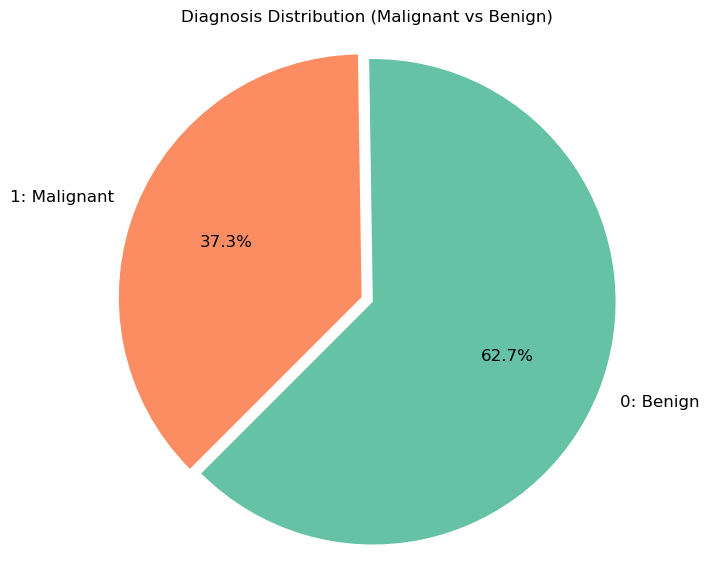

In [19]:
# 'diagnosis' 컬럼 값의 개수를 계산
counts = df['diagnosis'].value_counts().sort_index()

# 원형 그래프 그리기
plt.figure(figsize=(7, 7))
plt.title('Diagnosis Distribution (Malignant vs Benign)', fontsize=12)

# explode: '악성(1)' 파이를 살짝 떼어내어 강조하는 효과 (선택 사항)
explode = (0, 0.05)
colors = ['#66c2a5', '#fc8d62']

# autopct: 부채꼴 안에 퍼센트(%)를 자동으로 표시하는 포맷 (소수점 첫째 자리까지)
# labels: 범례에 들어갈 라벨 직접 지정
plt.pie(counts.values,
        labels=['0: Benign', '1: Malignant'],
        autopct='%.1f%%', # 예: 62.7%
        startangle=225,    # 90도(12시 방향)에서 시작
        explode=explode,  # 악성 부분 강조
        colors=colors,
        textprops={'fontsize': 12}) # 텍스트 크기 조정

plt.axis('equal') # 원을 타원이 아닌 정원으로 유지
plt.show()


### 결측치 확인

In [20]:
# 전체 데이터셋의 총 결측치 개수 확인
print(f"총 결측치 수: {df.isnull().sum().sum()}개")

총 결측치 수: 0개


암 데이터에서 이상치는 **"아주 특이하게 거대한 암세포"** 일 수도 있기 때문에,

무조건 삭제하기보다 '이런 데이터도 있구나' 하고 인지하는 것이 중요하다.

## 데이터의 통계 정보 확인

In [21]:
# 통계적 요약 확인
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 데이터 통계 정보 시각화(Boxplot)

박스플롯의 박스(Box)는 해당 그룹 데이터의 **중앙 50%의 분포(IQR)** 를 표현한다.

 따라서 두 그룹의 박스가 얼마나 멀리 떨어져 있고 겹치지 않는지를 통해 해당 특징이 두 그룹을 구분하는 능력, 즉 분류 모델에서의 중요도를 판단할 수 있다.

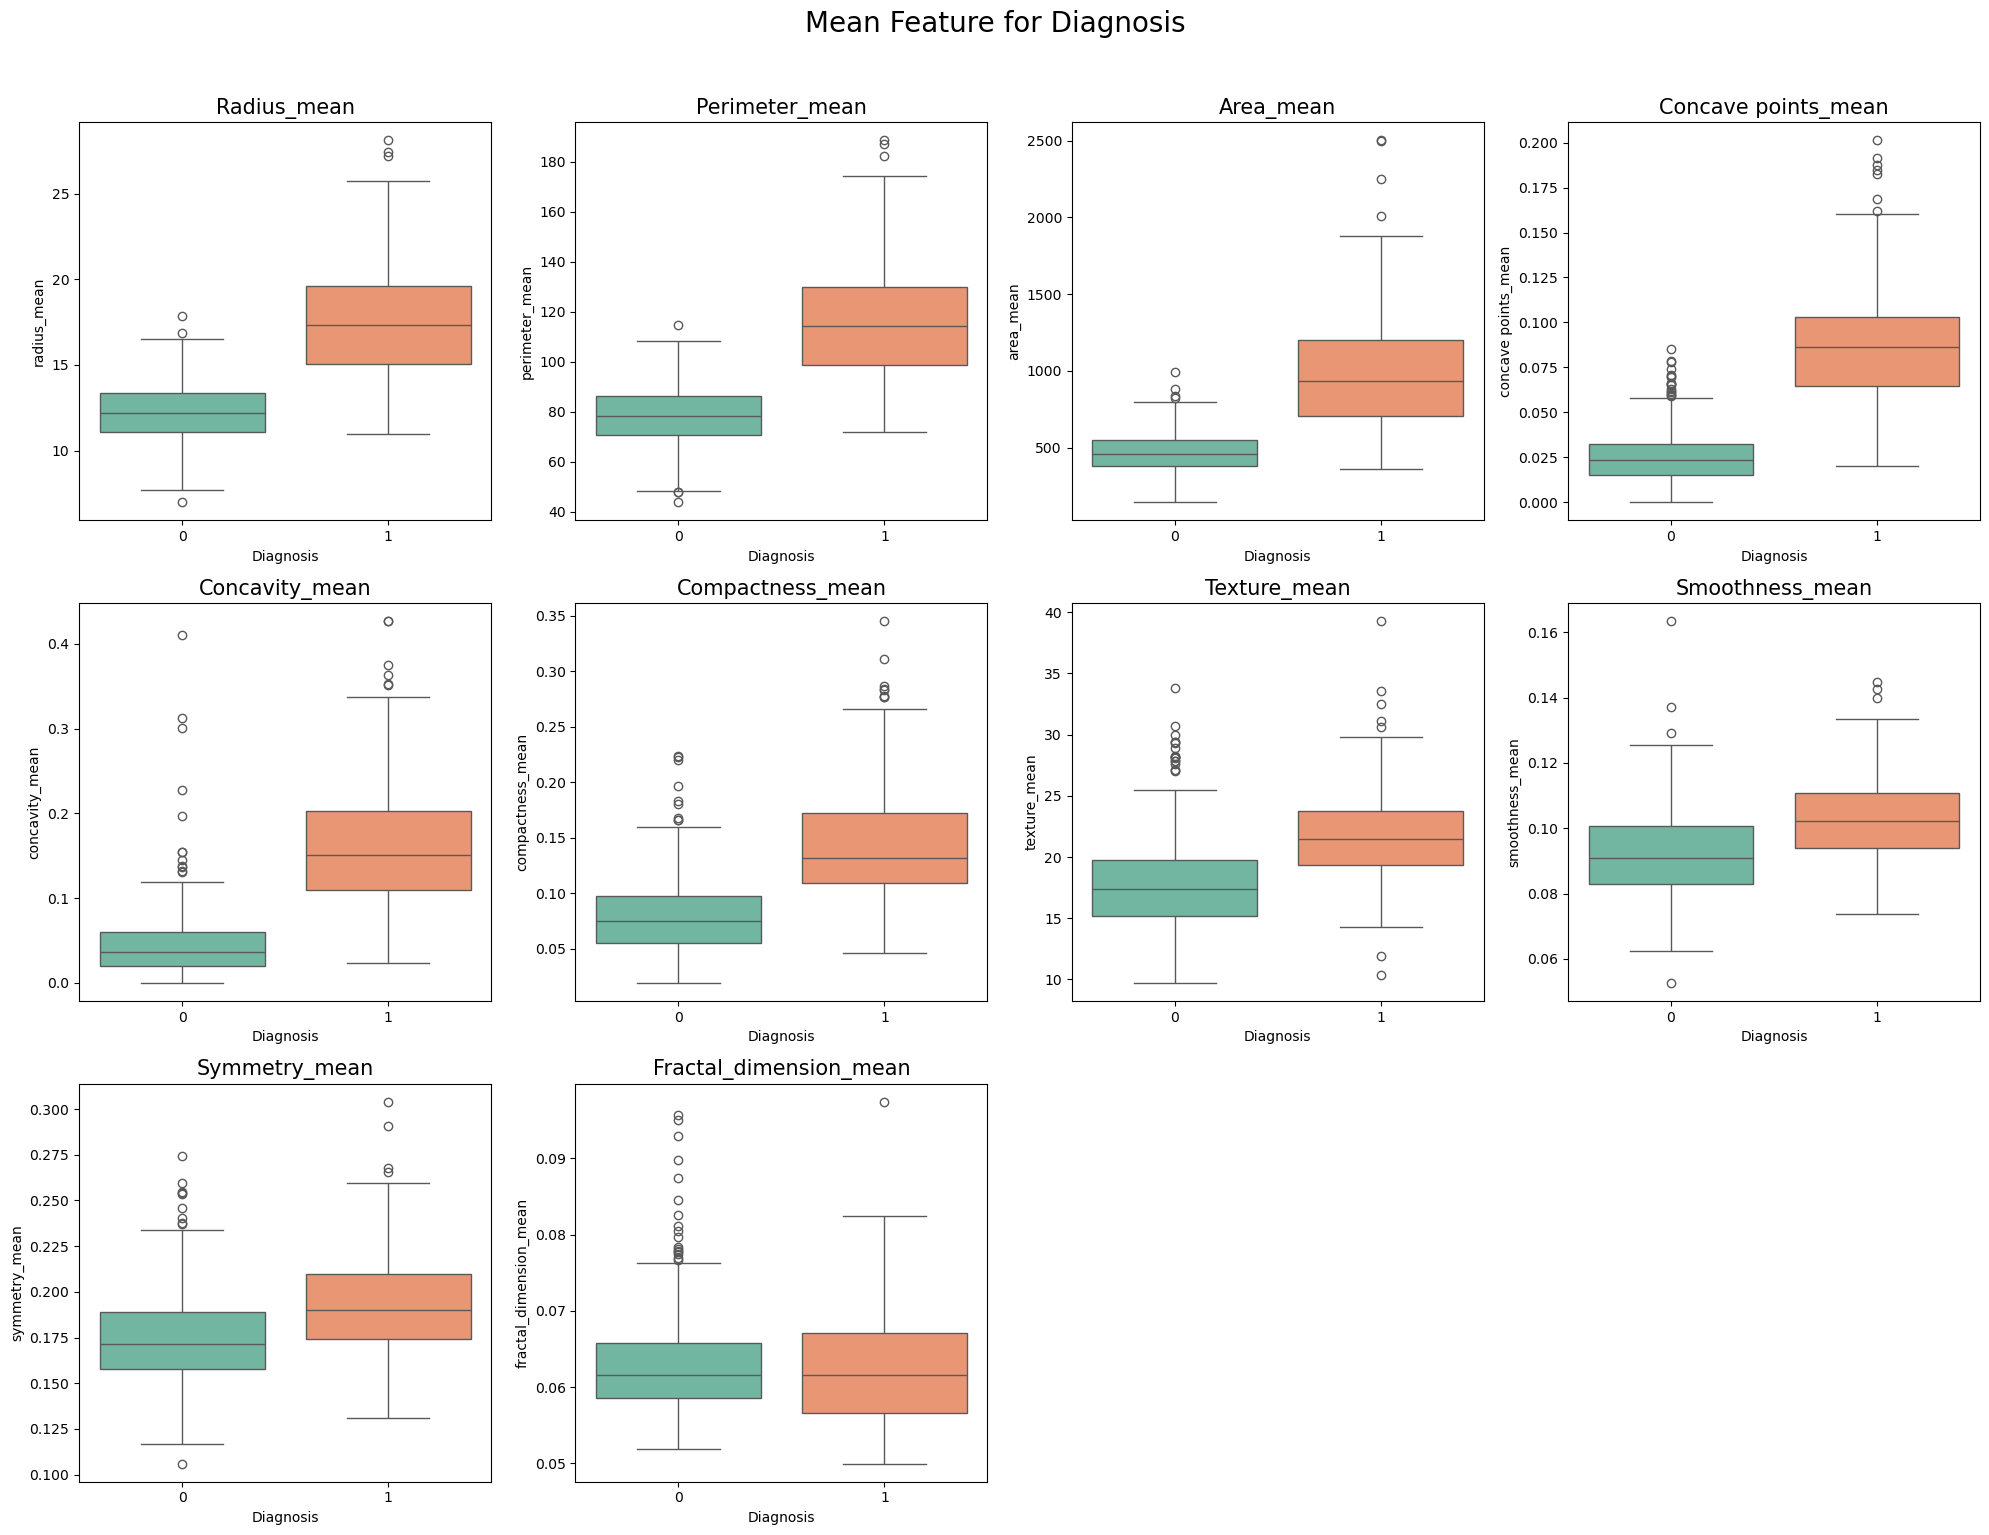

In [22]:
# 분류 능력이 높은 특징들을 맨 앞에 배치
mean_order = [
    'radius_mean',
    'perimeter_mean',
    'area_mean',
    'concave points_mean',
    'concavity_mean',
    'compactness_mean',
    'texture_mean',
    'smoothness_mean',
    'symmetry_mean',
    'fractal_dimension_mean'
]

# 10개 'mean' 특징에 대해 박스플롯 생성
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()
fig.suptitle('Mean Feature for Diagnosis', fontsize=20, y=1.02)

for i, col in enumerate(mean_order):
    sns.boxplot(x='diagnosis', y=col, hue='diagnosis', data=df, ax=axes[i], palette='Set2', legend=False)

    axes[i].set_title(f'{col.capitalize()}', fontsize=15)
    axes[i].set_xlabel('Diagnosis')
    axes[i].set_ylabel(col)

# 사용하지 않은 서브플롯 제거
for j in range(len(mean_order), len(axes)):
    fig.delaxes(axes[j])

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

mean 특징은 종양의 일반적인 특성을 보여주며, 특히 크기 관련 특징 `Radius`, `Perimeter`, `Area` 이 악성/양성 그룹을 구분하는 가장 강력한 예측 변수임을 명확히 보여준다.

💡 스케일링 필요성: Area_mean의 최대값은 2500에 근접하는 반면, Smoothness_mean의 최대값은 0.16에 불과하다.

이처럼 특징 간 값 범위 차이가 극심한 경우에는 **표준화(StandardScaler)** 작업이 필수적이다.

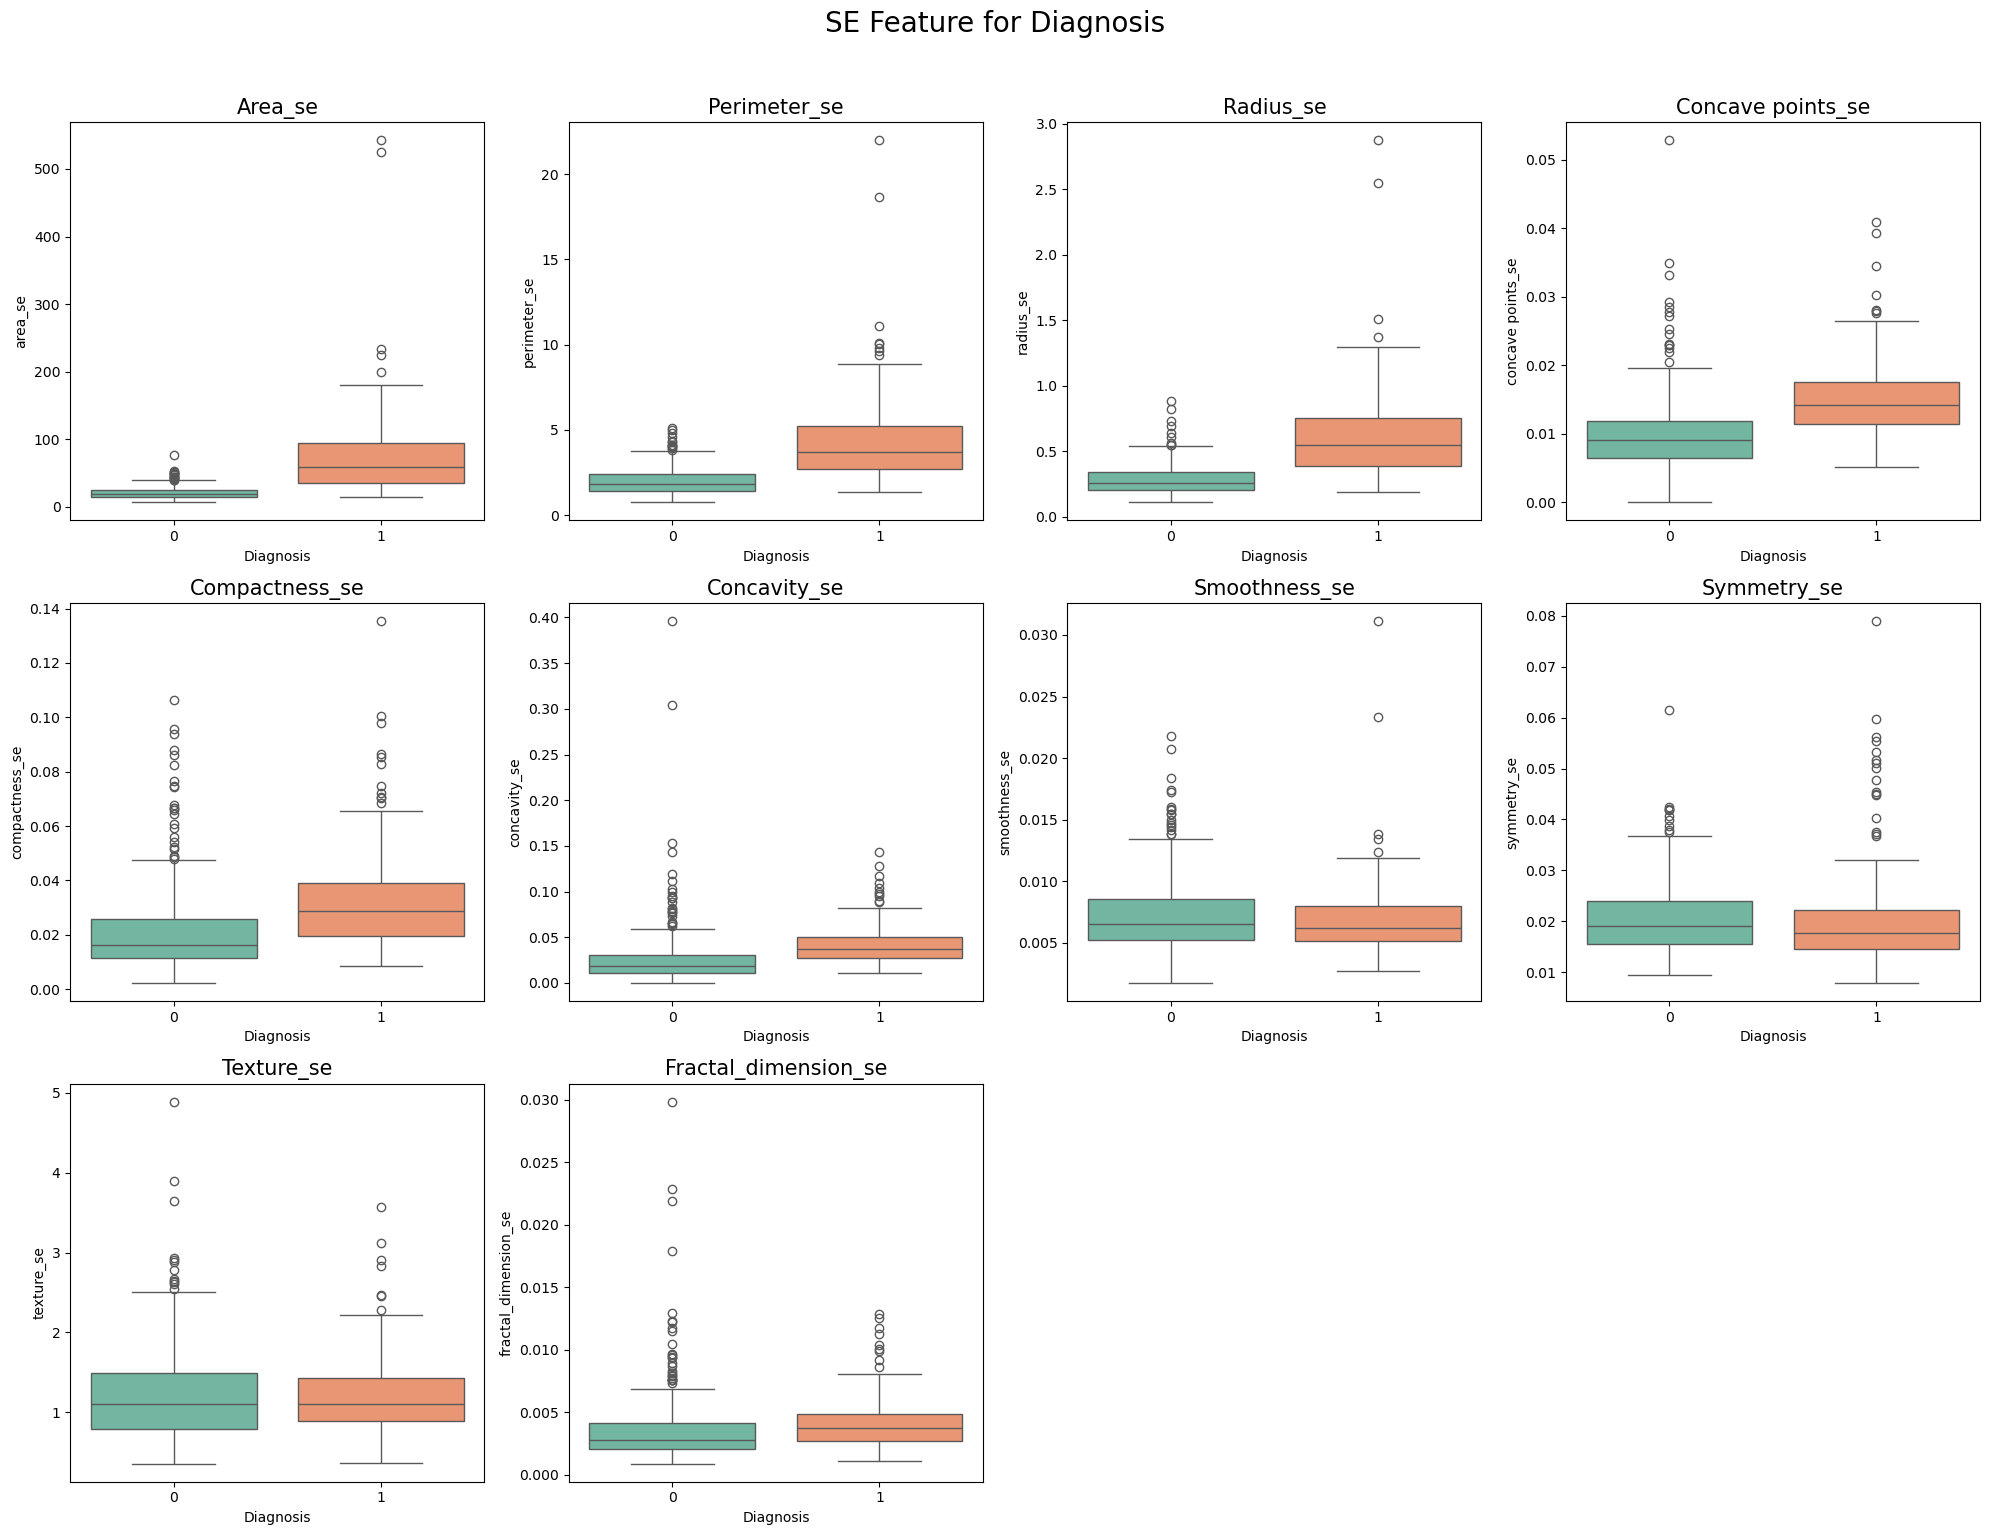

In [23]:
# 분류 능력이 높은 특징들을 맨 앞에 배치
se_order = [
    'area_se',
    'perimeter_se',
    'radius_se',
    'concave points_se',
    'compactness_se',
    'concavity_se',
    'smoothness_se',
    'symmetry_se',
    'texture_se',
    'fractal_dimension_se'
]

# 10개 'se' 특징에 대해 박스플롯 생성
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()
fig.suptitle('SE Feature for Diagnosis', fontsize=20, y=1.02)

for i, col in enumerate(se_order):
    sns.boxplot(x='diagnosis', y=col, hue='diagnosis', data=df, ax=axes[i], palette='Set2', legend=False)

    axes[i].set_title(f'{col.capitalize()}', fontsize=15)
    axes[i].set_xlabel('Diagnosis')
    axes[i].set_ylabel(col)

# 사용하지 않은 서브플롯 제거
for j in range(len(se_order), len(axes)):
    fig.delaxes(axes[j])

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

악성 종양은 양성 종양에 비해 `Area_se`, `Perimeter_se`, `Radius_se`와 같은 크기/형태 기반 특징들의 변화(SE)가 훨씬 더 크다.

이는 빠르고 통제되지 않으며 불규칙한 성장과 경계의 침습성을 시사한다.

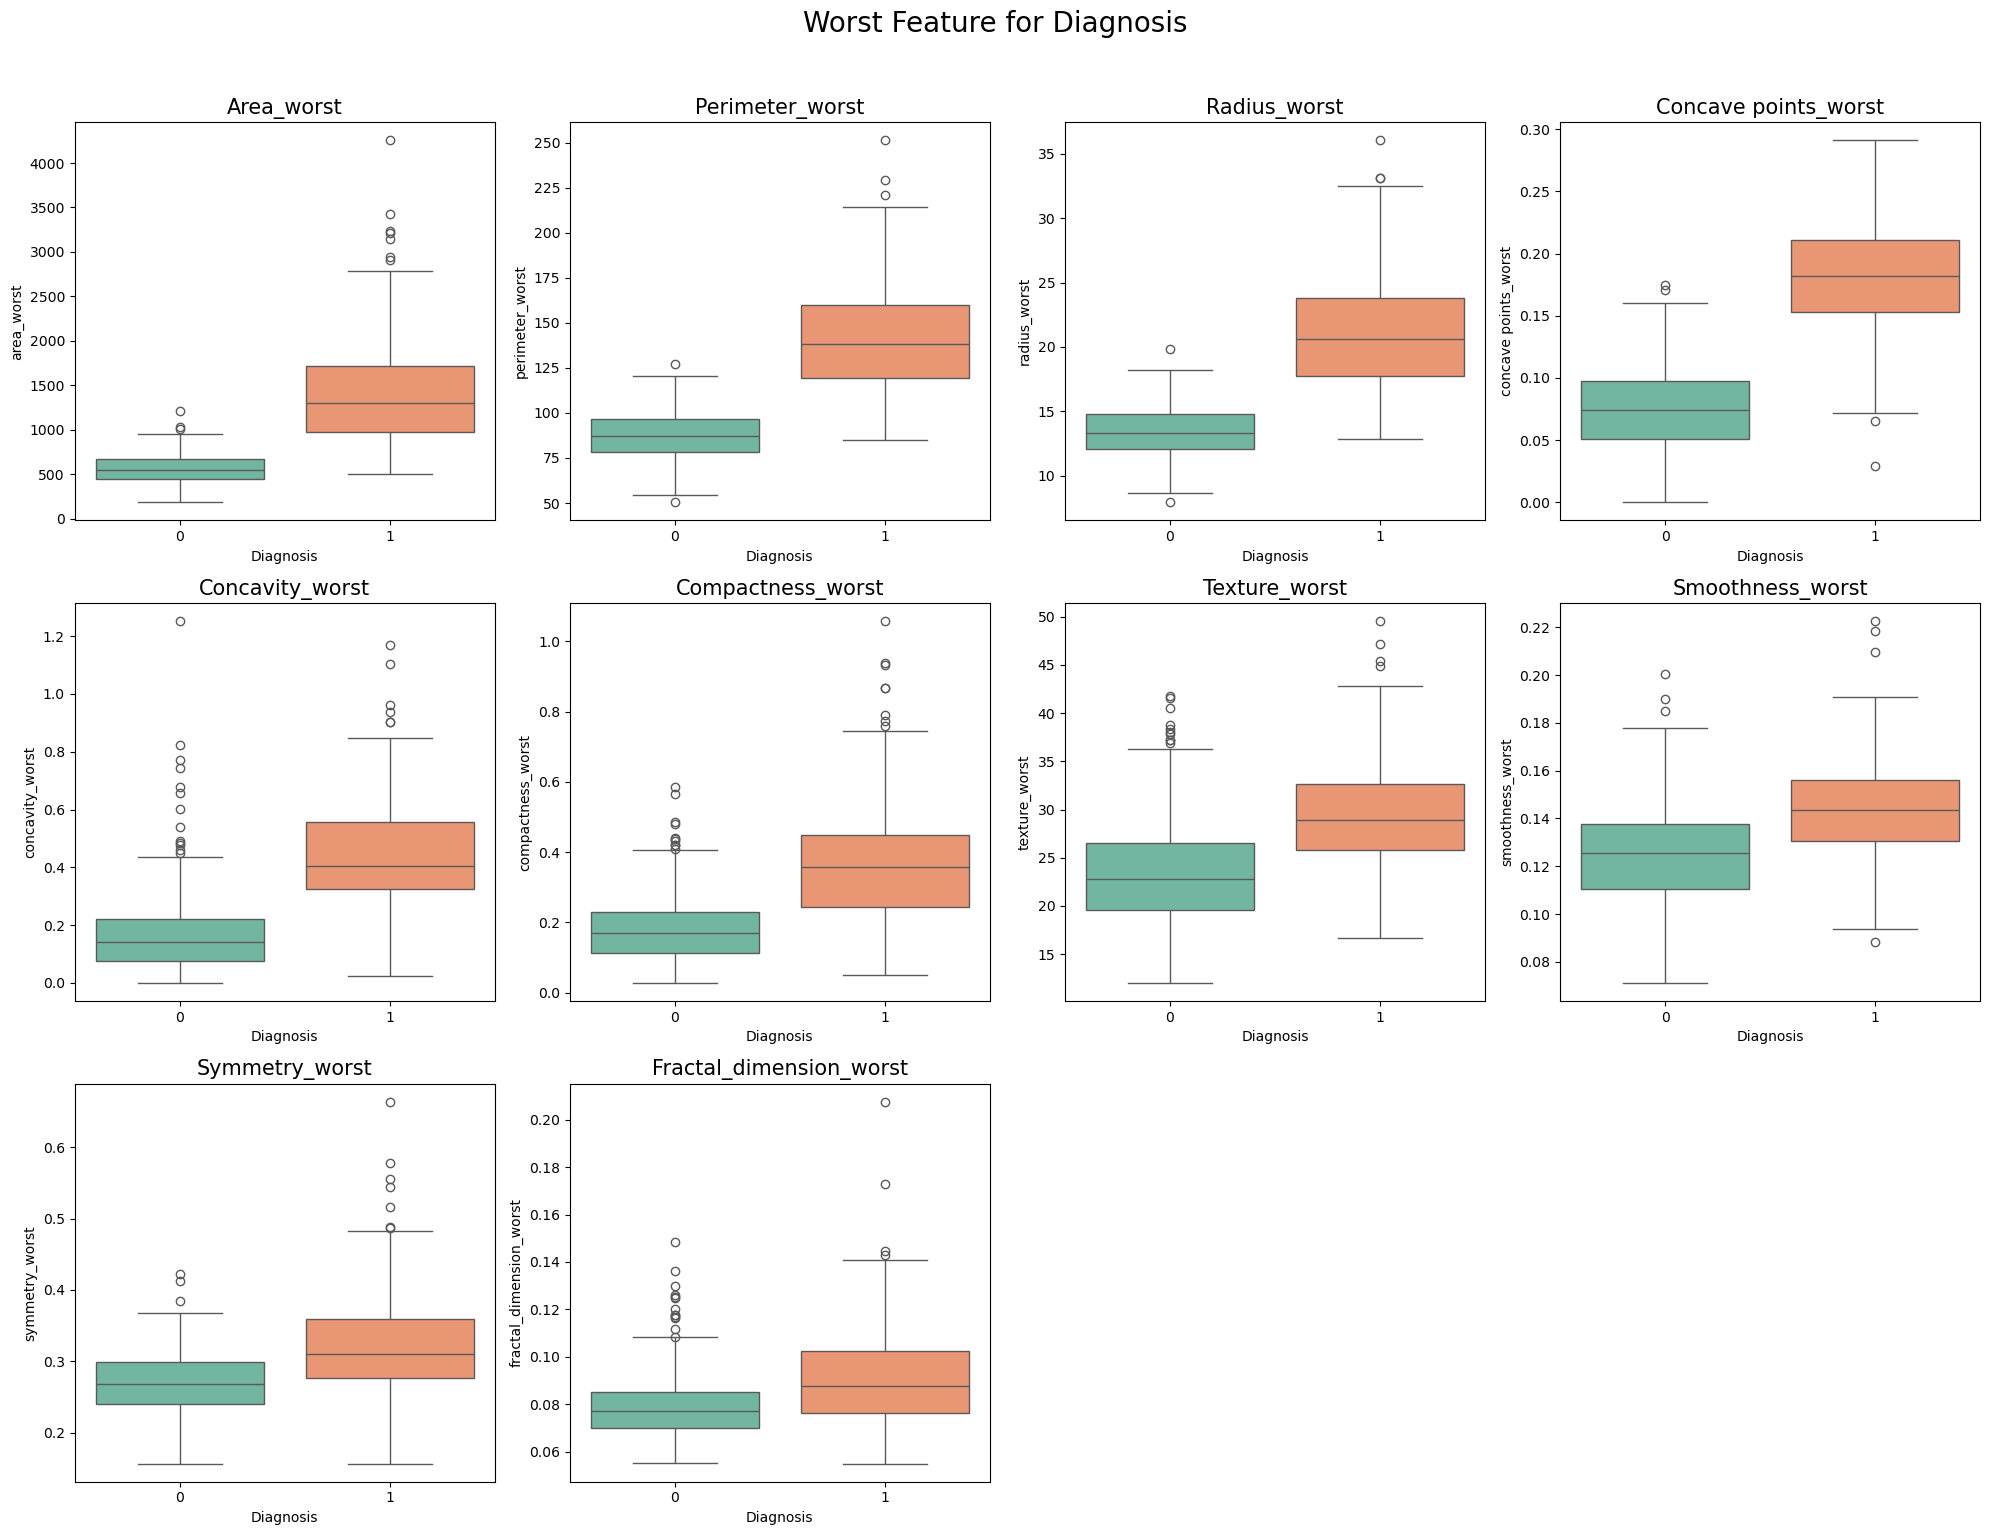

In [24]:
# 분류 능력이 높은 특징들을 맨 앞에 배치
worst_order = [
    'area_worst',
    'perimeter_worst',
    'radius_worst',
    'concave points_worst',
    'concavity_worst',
    'compactness_worst',
    'texture_worst',
    'smoothness_worst',
    'symmetry_worst',
    'fractal_dimension_worst'
]

# 10개 'worst' 특징에 대해 박스플롯 생성
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()
fig.suptitle('Worst Feature for Diagnosis', fontsize=20, y=1.02)

# 10개 'worst' 특징에 대해 반복하며 박스플롯 생성
for i, col in enumerate(worst_order):
    sns.boxplot(x='diagnosis', y=col, hue='diagnosis', data=df, ax=axes[i], palette='Set2', legend=False)

    axes[i].set_title(f'{col.capitalize()}', fontsize=15)
    axes[i].set_xlabel('Diagnosis')
    axes[i].set_ylabel(col)

# 사용하지 않은 서브플롯 제거
for j in range(len(worst_order), len(axes)):
    fig.delaxes(axes[j])

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

Worst 특징들은 mean 특징들보다 악성/양성 그룹을 더욱 명확하게 분리한다.

즉, 가장 극단적인 세포 핵의 측정값이 진단 결정에 가장 큰 영향을 미친다는 의학적 가설을 데이터가 입증하고 있다는 의미이다.

### 상관관계 확인(Heatmap)

In [25]:
# 상관관계 확인
corr_matrix = df.corr()

print(corr_matrix['diagnosis'].sort_values())

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0

# 데이터 전처리


## 데이터 분할

악성 데이터의 비율이 적으므로, 훈련/테스트 분할 시 비율 유지가 중요하다.

In [26]:
# 데이터 세트와 훈련 세트로 구분
from sklearn.model_selection import train_test_split

data = df.drop('diagnosis', axis=1)
target = df['diagnosis']

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42, stratify=target)

In [27]:
# 훈련 데이터 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


# 모델링

## 로지스틱 회귀

암 판정과 같은 이진 분류 문제에서 각 특성이 결과에 미치는 확률을 계산할 수 있다.

In [28]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [29]:
# 모델 성능 평가
print(lr.score(train_scaled, train_target))     # 훈련 세트
print(lr.score(test_scaled, test_target))       # 테스트 세트

0.9868131868131869
0.9649122807017544


로지스틱 회귀 모델은 학습을 통해 각 특성마다 고유한 **계수(Coefficient, 가중치)** 를 부여한다.

- 양수(+) 계수: 값이 클수록 `'악성(1)'`일 확률을 높임 (위험 요인)

- 음수(-) 계수: 값이 클수록 `'양성(0)'` 일 확률을 높임 (안전 요인)

이미 데이터를 표준화했기 때문에, 이 계수의 절댓값이 클수록 영향력이 큰 변수라고 확실하게 말할 수 있다.

In [30]:
print(lr.coef_.shape, lr.intercept_.shape)

(1, 30) (1,)


In [31]:
# 계수와 특성 이름을 결합하여 DataFrame 생성
# lr.coef_는 2차원 배열이므로 reshape(-1)을 통해 1차원으로 변경
coef_df = pd.DataFrame({
    'Feature': data.columns,
    'Coefficient': lr.coef_.reshape(-1)
})

# 절댓값 기준으로 내림차순 정렬
coef_df['Abs_Coef'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coef', ascending=False)

# 상위 10개 중요 변수 출력
print("Top 10 Feature Importance")
print(coef_df[['Feature', 'Coefficient']].head(10))

Top 10 Feature Importance
                Feature  Coefficient
21        texture_worst     1.434093
10            radius_se     1.233325
28       symmetry_worst     1.061264
7   concave points_mean     0.952813
26      concavity_worst     0.911406
13              area_se     0.909029
15       compactness_se    -0.906925
23           area_worst     0.900477
20         radius_worst     0.896968
6        concavity_mean     0.782298


### EDA(박스플롯)에서 본 직관과 모델의 학습 결과가 다른 이유

**"박스플롯은 변수 하나만 보지만(단변량), 로지스틱 회귀는 모든 변수의 관계를 함께 보기(다변량) 때문에"**

&nbsp;

1. 다중공선성의 함정

    위스콘신 데이터셋은 `radius(반지름)`, `area(면적)`, `perimeter(둘레)`가 사실상 같은 정보를 담고 있다 (반지름이 크면 당연히 면적도 크다.)

    비슷한 변수가 많으면, 로지스틱 회귀 모델은 이들의 중요도를 나누어 가진다. <br> 예를 들어, `radius_worst`가 가장 중요한데, `area_worst`가 그 중요도를 뺏어갈 수 있다.

    이 과정에서 상대적으로 상관관계가 낮은(독립적인) `texture_worst`나 `radius_se` 같은 변수가, "남은 오차를 보정하기 위해" 과도하게 높은 가중치를 부여받을 수 있디

    즉, 계수가 크다고 해서 반드시 가장 구분력이 좋은 변수는 아닐 수 있다.

    &nbsp;

2. '조건부' 중요도

    로지스틱 회귀의 계수는 "다른 모든 변수가 고정되어 있을 때의 영향력을 의미한다.

    radius만 놓고 보면 암/정상을 잘 구분하지만, 이미 모델이 radius 정보를 알고 있는 상태라면?

    오히려 **크기는 비슷한데 질감(texture)이 거친 경우** 가 암일 확률이 높다는 식의 디테일한 조건이 결정적일 수 있다 <br> 박스플롯에서는 겹쳐 보였던 구간이, 다른 변수들과 결합되면 중요한 경계선이 되는 원리이다.

    &nbsp;

3. 상호작용의 부재

    로지스틱 회귀는 선형 결합(직선)으로 경계를 그린다.

    반면 박스플롯의 concave points_mean 같은 변수들은 비선형적인 특징이 강했을 수 있다.

    로지스틱 회귀는 이런 비선형성을 완벽히 담아내지 못해 계수 순위가 직관과 다를 수 있다.

/tmp/ipykernel_1639/292570358.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10), palette='Set2')


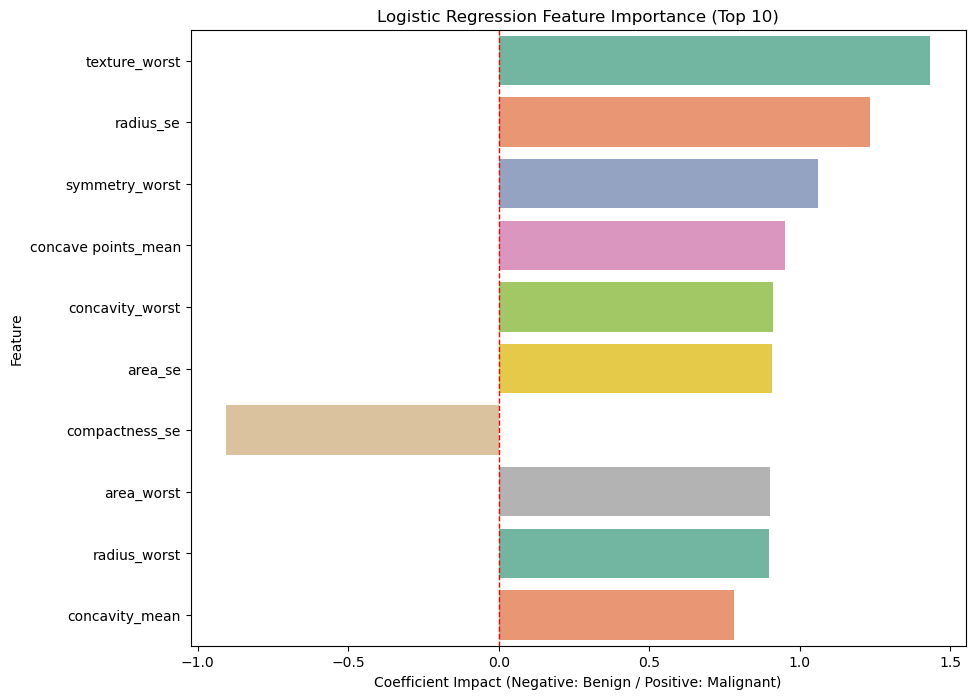

In [32]:
# 시각화 설정
plt.figure(figsize=(10, 8))
plt.title('Logistic Regression Feature Importance (Top 10)', fontsize=12)

# 상위 10개만 시각화
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10), palette='Set2')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1) # 기준선 (0)
plt.xlabel('Coefficient Impact (Negative: Benign / Positive: Malignant)')
plt.show()

이미 `radius, area, texture` 등 다른 변수들이 암을 예측하는 상황에서 `compactness_se`는 과도한 예측을 보정하는 역할을 하고 있을 가능성이 크다.

즉, 크기와 질감이 같다면 `compactness_se`가 큰 쪽이 오히려 정상일 확률이 높다는 미세한 패턴을 확인할 수 있다.

## 결정 트리 모델

In [33]:
# 결정 트리 모델 훈련
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))     # 훈련 세트
print(dt.score(test_scaled, test_target))       # 테스트 세트

1.0
0.9298245614035088


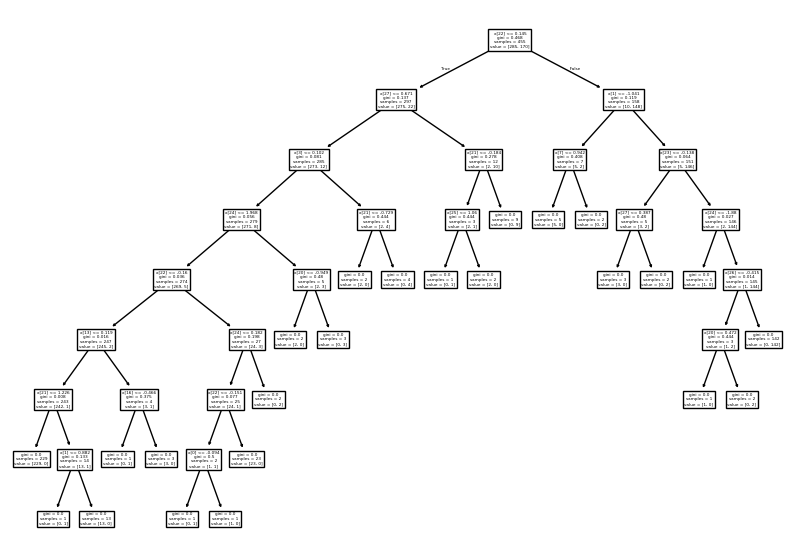

In [34]:
# 결정 트리 모델을 그림으로 표현
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

### 결정 트리의 변수 중요도 확인

/tmp/ipykernel_1639/2707577474.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=tree_importance.head(10), palette='Set2')


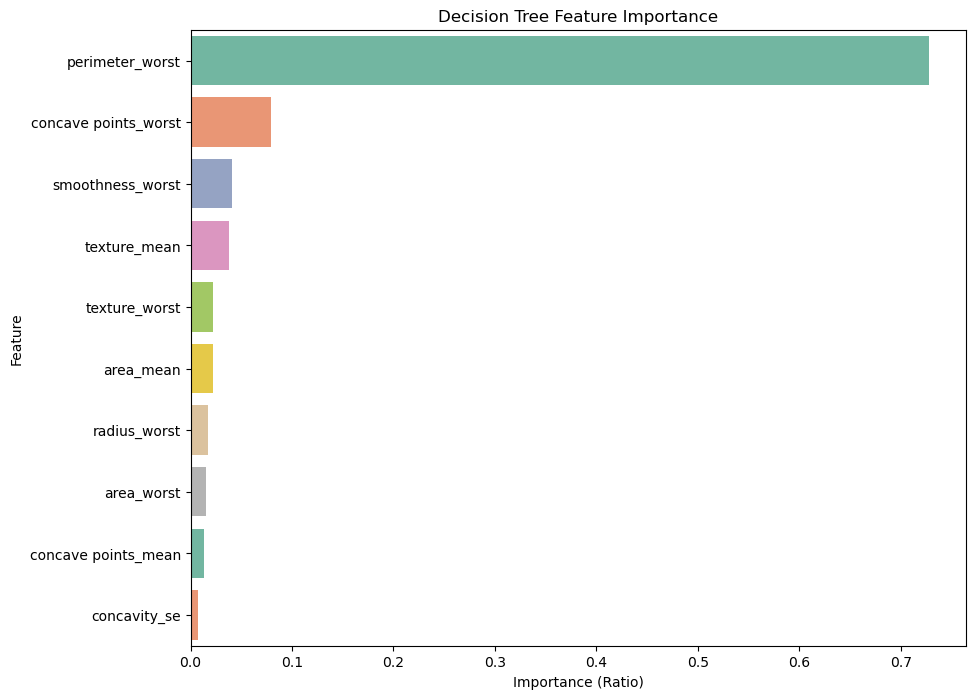

In [35]:
# 중요도 추출
tree_importance = pd.DataFrame({
    'Feature': data.columns,
    'Importance': dt.feature_importances_
})

# 내림차순 정령
tree_importance = tree_importance.sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(10, 8))
plt.title('Decision Tree Feature Importance', fontsize=12)
sns.barplot(x='Importance', y='Feature', data=tree_importance.head(10), palette='Set2')
plt.xlabel('Importance (Ratio)')
plt.show()

### 과대적합 해결

In [36]:
# 모델 단순화
dt = DecisionTreeClassifier(max_depth=5, random_state=42)

# 모델 학습
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))     # 훈련 세트
print(dt.score(test_scaled, test_target))       # 테스트 세트

0.9868131868131869
0.9210526315789473


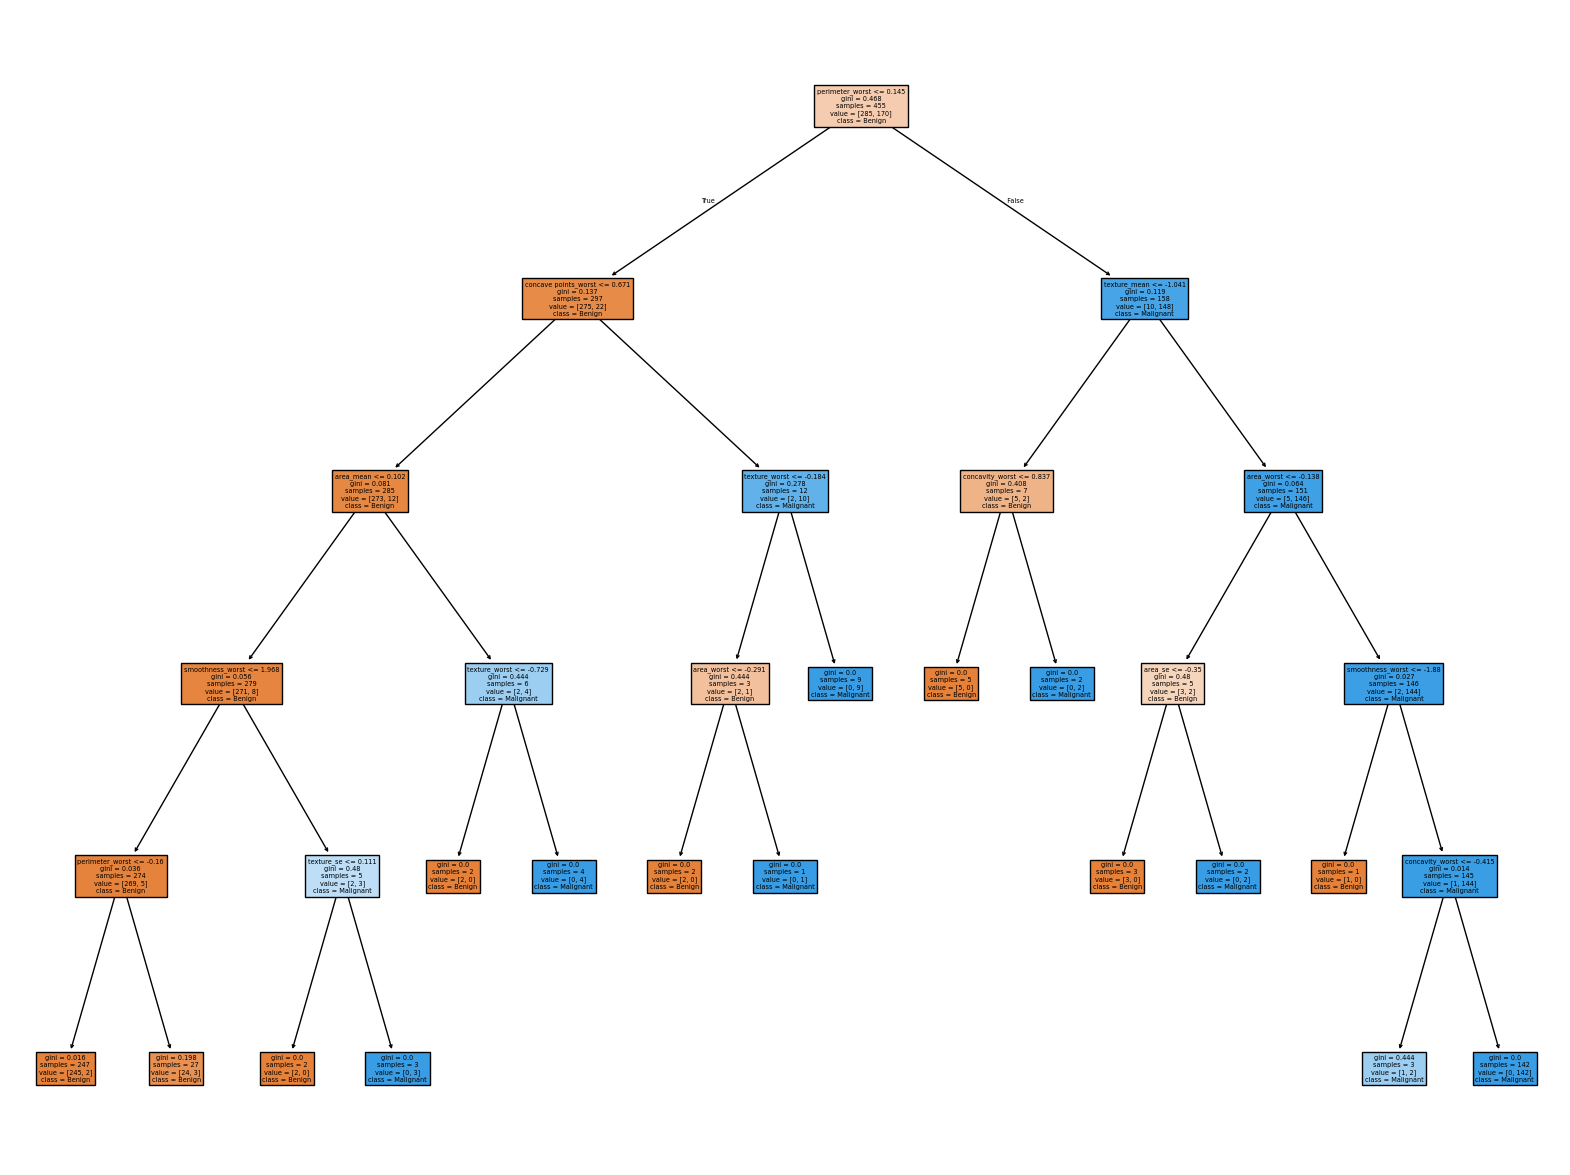

In [37]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=data.columns, class_names=['Benign', 'Malignant'])
plt.show()

### 그리드 서치


In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
# 탐색할 파라미터 지정
# max_depth: 3부터 10까지
# min_impurity_decrease: 0.0001부터 0.0005까지 미세하게 조정 (가지치기 기준)
params = {
    'max_depth': range(3, 11),
    'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]
}

In [40]:
# 그리드 서치 객체 생성
# n_jobs=-1: 모든 CPU 코어 사용 (속도 향상)
# cv=5: 5-폴드 교차 검증 자동 수행 (데이터를 5조각 내서 5번 검증)
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, cv=5)

In [41]:
# 그리드 서치 수행
gs.fit(train_input, train_target)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': range(3, 11), 'min_impurity_decrease': [0.0001, 0.0002, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [42]:
# 결과 확인
print("가장 좋은 파라미터:", gs.best_params_)
print(f"가장 좋은 교차 검증 점수: {gs.best_score_:.4f}")

가장 좋은 파라미터: {'max_depth': 7, 'min_impurity_decrease': 0.0001}
가장 좋은 교차 검증 점수: 0.9429


In [43]:
# 최적의 모델로 테스트 세트 최종 평가
best_dt = gs.best_estimator_
print(f"테스트 세트 점수: {best_dt.score(test_scaled, test_target):.4f}")

테스트 세트 점수: 0.8947


/home/ai_study/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


깊이 7은 훈련 데이터에 다소 과대적합된 경향이 있어, 더 단순하면서도 일반화 성능이 뛰어난 max_depth=5 모델을 최종 결정 트리 모델로 선정

## 랜덤 포레스트

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
# 랜덤 포레스트 객체 생성
rf = RandomForestClassifier(n_jobs=-1, random_state=42, oob_score=True)

# 모델 학습
rf.fit(train_scaled, train_target)

# 성능 평가
train_score = rf.score(train_scaled, train_target)
test_score = rf.score(test_scaled, test_target)
oob_score = rf.oob_score_

In [46]:
# 결과 확인
print(f"랜덤 포레스트 훈련 세트 점수: {train_score:.4f}")
print(f"랜덤 포레스트 테스트 세트 점수: {test_score:.4f}")
print(f"OOB 샘플 점수 (자체 검증): {oob_score:.4f}")

랜덤 포레스트 훈련 세트 점수: 1.0000
랜덤 포레스트 테스트 세트 점수: 0.9737
OOB 샘플 점수 (자체 검증): 0.9604


OOB 점수와 테스트 점수가 비슷하다는 것은 모델이 새로운 데이터에도 강하다는 것을 의미한다.

---

# 결론


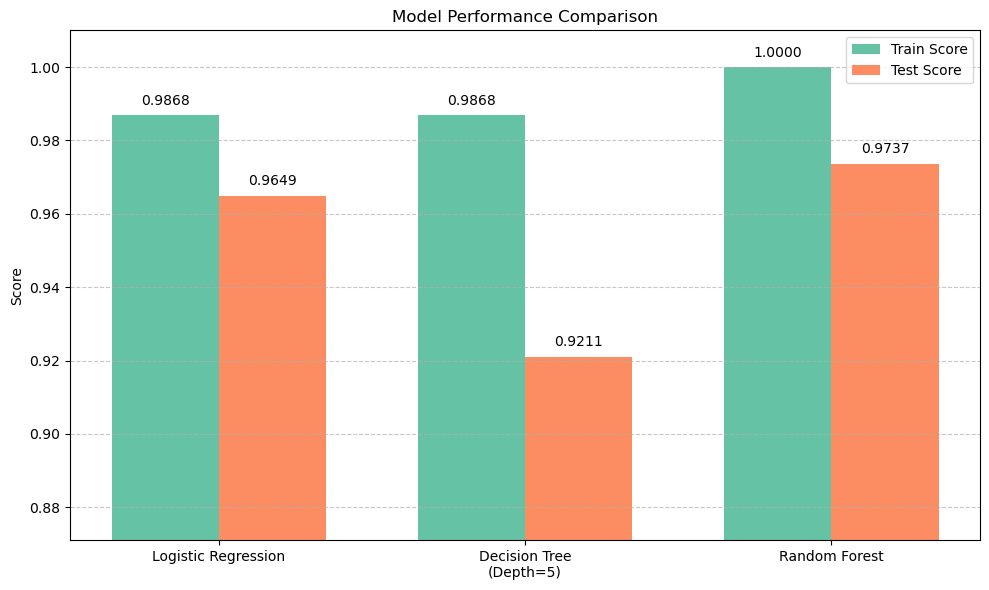

In [47]:
# 모델 정확도 비교
# 비교할 모델 리스트 정의
model_objects = [lr, dt, rf]
model_names = ['Logistic Regression', 'Decision Tree\n(Depth=5)', 'Random Forest']

# 실제 점수 계산
train_scores = [model.score(train_scaled, train_target) for model in model_objects]
test_scores = [model.score(test_scaled, test_target) for model in model_objects]

# 막대 그래프 생성
x = np.arange(len(model_names))
width = 0.35

plt.figure(figsize=(10, 6))

plt.bar(x - width/2, train_scores, width, label='Train Score', color='#66c2a5')
plt.bar(x + width/2, test_scores, width, label='Test Score', color='#fc8d62')

# 레이블 및 타이틀 설정
plt.ylabel('Score')
plt.title('Model Performance Comparison', fontsize=12)
plt.xticks(x, model_names)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# y축 범위 설정
min_score = min(min(train_scores), min(test_scores))
plt.ylim(min_score - 0.05, 1.01)

# 5. 막대 위에 실제 점수 표시
for i in range(len(model_names)):
    # 훈련 점수
    plt.text(x[i] - width/2, train_scores[i] + 0.002, f'{train_scores[i]:.4f}', ha='center', va='bottom', fontsize=10)
    # 테스트 점수
    plt.text(x[i] + width/2, test_scores[i] + 0.002, f'{test_scores[i]:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()        # 플롯의 여백을 자동으로 조정
plt.show()

로지스틱 회귀는 준수한 성능을 보였으나, 결정 트리 단계에서 설명력을 위해 깊이를 제한하자 점수가 다소 하락했다.

하지만 최종적으로 앙상블 기법인 랜덤 포레스트를 적용하여 과대적합을 제어하면서도 가장 높은 테스트 정확도를 달성했다.

/tmp/ipykernel_1639/2174720020.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_importance.head(10), palette='Set2')


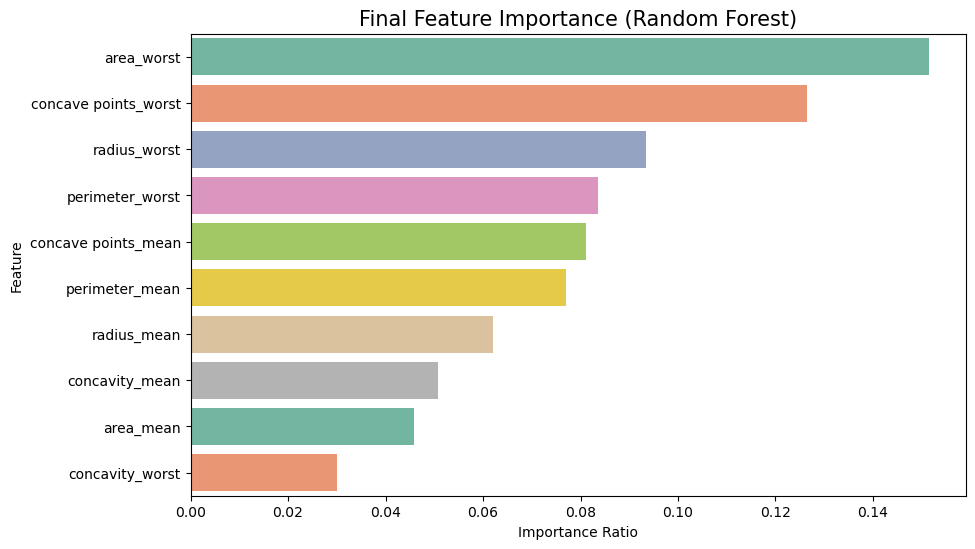

                 Feature  Importance
23            area_worst    0.151412
27  concave points_worst    0.126497
20          radius_worst    0.093475
22       perimeter_worst    0.083642
7    concave points_mean    0.081082
2         perimeter_mean    0.077126
0            radius_mean    0.061990
6         concavity_mean    0.050818
3              area_mean    0.045916
26       concavity_worst    0.030022


In [48]:
# 중요도 데이터프레임 생성
rf_importance = pd.DataFrame({
    'Feature': data.columns,
    'Importance': rf.feature_importances_
})

# 중요도 순으로 정렬
rf_importance = rf_importance.sort_values(by='Importance', ascending=False)

# 시각화 (Top 10)
plt.figure(figsize=(10, 6))
plt.title('Final Feature Importance (Random Forest)', fontsize=15)
sns.barplot(x='Importance', y='Feature', data=rf_importance.head(10), palette='Set2')
plt.xlabel('Importance Ratio')
plt.show()

# 수치 출력
print(rf_importance.head(10))

랜덤 포레스트의 변수 중요도가 가장 신뢰성이 높다고 판단했을 때,

유방암 진단의 핵심 변수는 `area_worst`, `concave point_worst`, `radius_worst`인 것을 알 수 있다.